In [1]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


there are 60000 train images with 28*28 shape


In [4]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [19]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [20]:
# building the model using sequential api
model = tf.keras.models.Sequential([

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(),
    Conv2D(128,(3,3),activation='relu'),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [21]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit (train) the model on the training data
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/5
1875/1875 [==============================] - 70s 36ms/step - loss: 0.1253 - accuracy: 0.9611 - val_loss: 0.0511 - val_accuracy: 0.9841
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0375 - val_accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0315 - val_accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0260 - val_accuracy: 0.9927
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0345 - accuracy: 0.9902
Test accuracy: 0.9902


In [24]:
# trying batch normalization
model = tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(128,(3,3),activation = 'relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])


In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 91s 48ms/step - loss: 0.0964 - accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0328 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0263 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0220 - accuracy: 0.9932


In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 5s 15ms/step - loss: 0.0282 - accuracy: 0.9916
Test accuracy: 0.9916


In [29]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit (train) the model on the training data with early stopping
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/50
1875/1875 [==============================] - 95s 49ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0441 - val_accuracy: 0.9897
Epoch 2/50
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0285 - val_accuracy: 0.9913
Epoch 3/50
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.0345 - val_accuracy: 0.9909
Epoch 4/50
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 0.0376 - val_accuracy: 0.9916
Epoch 5/50
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0514 - val_accuracy: 0.9875
Epoch 6/50
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0320 - val_accuracy: 0.9930
Epoch 7/50
313/313 [==============================] - 4s 14ms/step - loss: 0.0285 - accuracy: 0.9913
Test accuracy: 0.9913


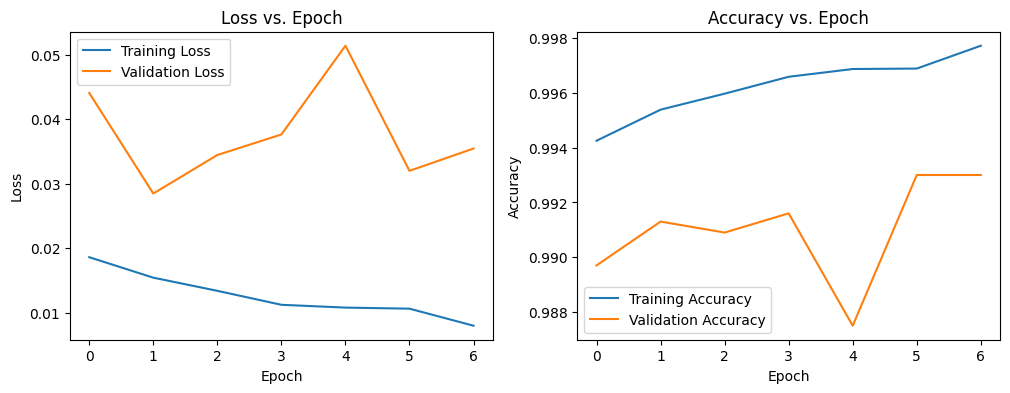

In [31]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
!git init
!git add mnist(handwritten_digit_recognition).ipynb
!git commit -m "first commit"


Reinitialized existing Git repository in /content/.git/
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `git add mnist(handwritten_digit_recognition).ipynb'
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


In [33]:
!git config --global user.email "shanmukhasahith.dev@gmail.com"
!git config --global user.name "Sahith"

In [36]:
!git branch -M main


In [37]:
!git remote add origin https://github.com/sahith2004/Deep-learning-practice.git
!git push -u origin main

error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/sahith2004/Deep-learning-practice.git'
